<a href="https://colab.research.google.com/github/songseokbeom/ML_study/blob/master/2_3_Adaline_model_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'\
                 'machine-learning-databases/iris/iris.data',
                 header=None)

y = df.iloc[0:100, 4].values # y is numpy array (by.df.values)
y = np.where(y == 'Iris-setosa', -1, 1)
X = np.transpose(df.iloc[0:100, [0, 2]].values) 
y = np.reshape(y, (1, y.shape[0]))
# pandas의 dataframe 객체 df에 데이터셋 저장 이 후, dataframe의 iloc 메소드로 label과 feature를 추출

In [0]:
class Adaline_BatchGD(object):

  def __init__(self, lr=0.01, iter=50, random_state=1):
    
    self.lr=lr
    self.iter=iter
    self.random_state=random_state
    # 학습률과 epoch 설정  

  def fit(self, X, y):

    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc=0.0, scale=0.01, size=(1, X.shape[0]))
    self.b = 0
    self.cost = []

    for i in range(self.iter):

      net_input = self.net_input(X)
      yhat = self.activation(net_input) # activation function
      GD = yhat - y # gradient vector for n example 
      self.w -= self.lr * np.dot(GD, X.T) # weight update
      self.b -= self.lr * GD.sum() # bias update
      cost = (GD**2).sum() / 2.0 # cost for this iteration
      self.cost.append(cost)
    return self


  # linear function (WX+b)
  def net_input(self, X): 
    return np.dot(self.w, X) + self.b
    
  # activation function(Relu, tanh, sigmoid ...)
  def activation(self, X):
    return X


  def predict(self, X):
    return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)


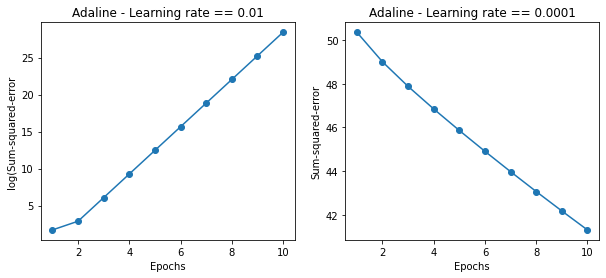

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# model1(learning_rate == 0.01)
model1 = Adaline_BatchGD(lr=0.01, iter=10).fit(X, y)
ax[0].plot(range(1, len(model1.cost) +1 ),
           np.log10(model1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error')
ax[0].set_title('Adaline - Learning rate == 0.01')

# model2(learning_rate == 0.0001)
model2 = Adaline_BatchGD(lr=0.0001, iter=10).fit(X, y)
ax[1].plot(range(1, len(model2.cost)+1),
           model2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate == 0.0001')

plt.show() 

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique: find unique elements in numpy array

  x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
  x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]))
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1.T, xx2.T, Z.T, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[0, y[0, :]==cl],
                y=X[1, y[0, :]==cl],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

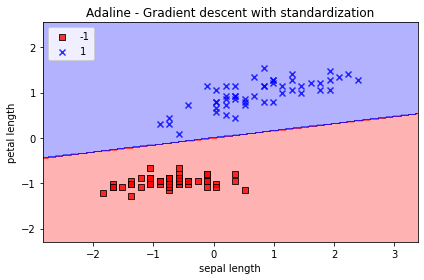

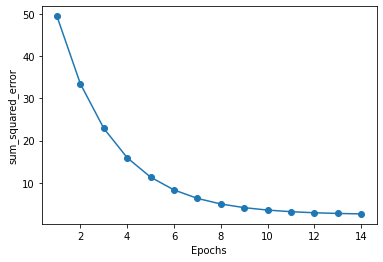

In [44]:
from sklearn import preprocessing
# standardization input (X)

X_scaled = preprocessing.scale(X)
model3 = Adaline_BatchGD(iter=14, lr=0.01)
model3.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=model3)
plt.title('Adaline - Gradient descent with standardization')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(model3.cost)+1),
         model3.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum_squared_error')
plt.show()
